In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bird_df = pd.read_csv("Bird_Strikes.csv")

In [3]:
bird_df.head().T

,0,1,2,3,4
RecordID,202152,208159,207601,215953,219878
AircraftType,Airplane,Airplane,Airplane,Airplane,Airplane
AirportName,LAGUARDIA NY,DALLAS/FORT WORTH INTL ARPT,LAKEFRONT AIRPORT,SEATTLE-TACOMA INTL,NORFOLK INTL
AltitudeBin,"(1000, 2000]","(-1, 0]","(30, 50]","(30, 50]","(30, 50]"
MakeModel,B-737-400,MD-80,C-500,B-737-400,CL-RJ100/200
NumberStruck,Over 100,Over 100,Over 100,Over 100,Over 100
NumberStruckActual,859,424,261,806,942
Effect,Engine Shut Down,NaN,NaN,Precautionary Landing,NaN
FlightDate,11/23/00 0:00,7/25/01 0:00,9/14/01 0:00,9/5/02 0:00,6/23/03 0:00
Damage,Caused damage,Caused damage,No damage,No damage,No damage


In [4]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

In [5]:
# Basic data visualizations - Exploring the Damage variable

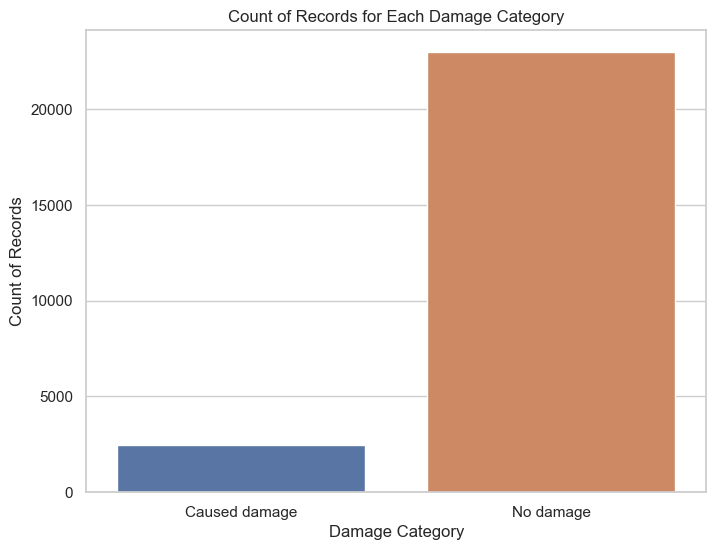

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Damage', data=bird_df, hue='Damage', legend=False)

plt.title('Count of Records for Each Damage Category')
plt.xlabel('Damage Category')
plt.ylabel('Count of Records')

plt.show()

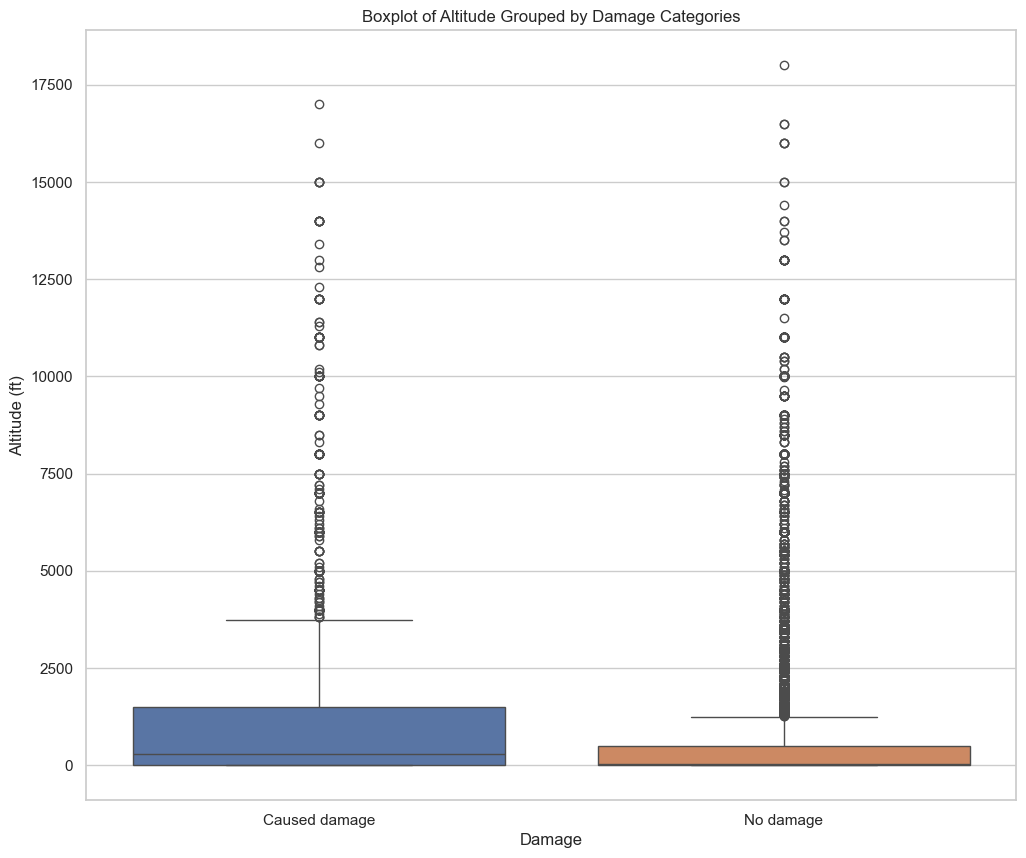

In [7]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='Damage', y='Altitude', data=bird_df, hue='Damage', legend=False)

plt.title('Boxplot of Altitude Grouped by Damage Categories')
plt.xlabel('Damage')
plt.ylabel('Altitude (ft)')

plt.show()

In [8]:
# Begin data preprocessing.
# Damage will be the target.
# Remove features that are not relevant to predicting Damage or have a large amount of missing values. Some feature values could not be known before a flight occurs, such as Effect and Cost.

In [9]:
irrelevant_features = [
    'RecordID',
    'Cost',      
    'Effect',            
    'Remarks',
    'NumberStruck',
    'ConditionsPrecipitation',
    'PeopleInjured',
    'RemainsCollected?',
    'RemainsSentToSmithsonian',
    'AltitudeBin',
    'FlightDate'
]

bird_df = bird_df.drop(columns=irrelevant_features, errors='ignore')

In [10]:
bird_df.head().T

,0,1,2,3,4
AircraftType,Airplane,Airplane,Airplane,Airplane,Airplane
AirportName,LAGUARDIA NY,DALLAS/FORT WORTH INTL ARPT,LAKEFRONT AIRPORT,SEATTLE-TACOMA INTL,NORFOLK INTL
MakeModel,B-737-400,MD-80,C-500,B-737-400,CL-RJ100/200
NumberStruckActual,859,424,261,806,942
Damage,Caused damage,Caused damage,No damage,No damage,No damage
Engines,2,2,2,2,2
Operator,US AIRWAYS*,AMERICAN AIRLINES,BUSINESS,ALASKA AIRLINES,COMAIR AIRLINES
OriginState,New York,Texas,Louisiana,Washington,Virginia
FlightPhase,Climb,Landing Roll,Approach,Climb,Approach
WildlifeSize,Medium,Small,Small,Small,Small


In [11]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AircraftType        25429 non-null  object
 1   AirportName         25429 non-null  object
 2   MakeModel           25429 non-null  object
 3   NumberStruckActual  25429 non-null  int64 
 4   Damage              25429 non-null  object
 5   Engines             25195 non-null  object
 6   Operator            25429 non-null  object
 7   OriginState         24980 non-null  object
 8   FlightPhase         25429 non-null  object
 9   WildlifeSize        25429 non-null  object
 10  ConditionsSky       25429 non-null  object
 11  WildlifeSpecies     25429 non-null  object
 12  PilotWarned         25429 non-null  object
 13  Altitude            25429 non-null  int64 
 14  IsAircraftLarge?    25429 non-null  object
dtypes: int64(2), object(13)
memory usage: 2.9+ MB


In [12]:
# Define functions for getting preprocessed data

In [13]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [14]:
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= None, None, None, None, None, None
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [15]:
# Define function for plotting confusion matrix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True, fmt='g')
    plt.show()
    return cfm_df

In [16]:
# Using Softmax Regression

In [17]:
# Determine categorical columns and use one-hot encoding
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

categorical_columns = ['AircraftType', 'AirportName', 'MakeModel', 'Operator', 'FlightPhase', 'OriginState', 'ConditionsSky', 'PilotWarned', 'NumberStruckActual', 'WildlifeSpecies', 'WildlifeSize', 'Engines']

encoder = preprocessing.OneHotEncoder(sparse_output=False)

X = bird_df.drop(columns='Damage', errors='ignore')
X = X[categorical_columns]

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns)
    ], 
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(X)

encoded_columns = column_transformer.get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

numerical_columns = ['Altitude']
X_numerical_df = bird_df.drop(columns='Damage', errors='ignore')
X_numerical_df = X_numerical_df[numerical_columns]

final_df = pd.concat([X_encoded_df, X_numerical_df], axis=1)
encoder = preprocessing.OneHotEncoder(sparse_output=False)

X = bird_df.drop(columns='Damage', errors='ignore')
X = X[categorical_columns]

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns)
    ], 
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(X)

encoded_columns = column_transformer.get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

In [18]:
# Determine numerical columns and use sklearn's StandardScaler() to scale them
numerical_columns = ['Altitude']
X_numerical_df = bird_df.drop(columns='Damage', errors='ignore')
X_numerical_df = X_numerical_df[numerical_columns]

scaler = preprocessing.StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical_df)

In [19]:
# Combine into a final dataframe of preprocessed data 
X_final = np.hstack([X_encoded_df.values, X_numerical_scaled])
final_df = pd.concat([X_encoded_df, X_numerical_df], axis=1)
final_df.head().T

,0,1,2,3,4
cat__AircraftType_Airplane,1.0,1.0,1.0,1.0,1.0
cat__AirportName_ABERDEEN REGIONAL AR,0.0,0.0,0.0,0.0,0.0
cat__AirportName_ABILENE REGIONAL ARPT,0.0,0.0,0.0,0.0,0.0
cat__AirportName_ABRAHAM LINCOLN CAPITAL ARPT,0.0,0.0,0.0,0.0,0.0
cat__AirportName_ADAMS COUNTY- LEGION FIELD,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
cat__Engines_3,0.0,0.0,0.0,0.0,0.0
cat__Engines_4,0.0,0.0,0.0,0.0,0.0
cat__Engines_C,0.0,0.0,0.0,0.0,0.0
cat__Engines_nan,0.0,0.0,0.0,0.0,0.0


In [20]:
# Apply one-hot encoding to the target
label_encoder = preprocessing.LabelEncoder()
bird_df['Damage'] = label_encoder.fit_transform(bird_df['Damage'])

In [21]:
X = final_df
n_classes = len(np.unique(bird_df['Damage']))
y = np.eye(n_classes)[bird_df['Damage']]
print(X.shape[0], ' ', y.shape[0])

25429   25429


In [22]:
import math
def sigmoid(z: np.ndarray) -> np.ndarray:
    return pow(math.e, z) / (1 + pow(math.e, z))

In [23]:
def softmax(z: np.ndarray) -> np.ndarray:
    """ Computes the stablized version of the softmax

        Args:
            z: A vector or matrix of continuous values.

        Return:
            A NumPy array with the same shape as the input.
    """
    z_max = np.max(z, axis=1, keepdims=True)
    return np.exp(z - z_max) / np.sum(np.exp(z - z_max), axis=1, keepdims=True)

In [24]:
def nll_loss(y: np.ndarray, probs: np.ndarray, class_weights: np.ndarray) -> float:
    """ Computes the average generalized NLL Loss

        Args:
            y: The ground truth one-hot encoded labels
                given as matrix of shape (M, |K|).

            probs: The predicted probabilities for the
                corresponding labels given as a matrix
                of shape (M, |K|)
    """    
    weights = np.sum(y * class_weights, axis=1)
    return (-1 / y.shape[0]) * np.sum(weights * np.log(np.sum(y * probs, axis=1)))

In [25]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [26]:
from sklearn.utils.class_weight import compute_class_weight
class SoftmaxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:

            alpha: learning rate or step size.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent.
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            W: Matrix of weights with shape (N, |K|) 

            trn_loss: Stores the training loss for each epoch.

            vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):

        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    
    def fit(
         self, 
         X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """
            Args:
                X: Training features/data
                y: Training labels
                X_vld: Validation features/data
                y_vld: Validation labels
                seed: Seed used for initializing weights
        """
        np.random.seed(self.seed)

        self.trn_loss = []
        self.vld_loss = []

        n_classes = len(np.unique(y))
        self.W = np.random.rand(X.shape[1], n_classes)

        M = X.shape[0]  

        class_labels = np.argmax(y, axis=1)
        class_weights = compute_class_weight('balanced', classes=np.unique(class_labels), y=class_labels)
        class_weights = np.array(class_weights)
        
        for epoch in range(self.epochs):
            batches = get_batches(M, self.batch_size)
            
            for batch in batches:
                X_b = X[batch]
                y_b = y[batch]

                
                Z = X_b @ (self.W) 
                Y_probs = softmax(Z) 
                
                grad_W = X_b.T @ (Y_probs - y_b) / len(batch)
                
                self.W -= self.alpha * grad_W
    
            Y_trn_probs = softmax(X.dot(self.W))
            trn_epoch_loss = nll_loss(y, Y_trn_probs, class_weights=class_weights)
            self.trn_loss.append(trn_epoch_loss)
    
            if X_vld is not None and y_vld is not None:
                Y_vld_probs = softmax(X_vld.dot(self.W))
                trn_epoch_loss = nll_loss(y, Y_trn_probs, class_weights=class_weights)
                self.vld_loss.append(vld_epoch_loss)
        
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        Z = X @ self.W
    
        Y_probs = softmax(Z)
        
        y_hat = np.argmax(Y_probs, axis=1)
    
        return y_hat

In [27]:
X = X_final 
y = y

In [28]:
# Get preprocessed data and fit the model to the training data
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

sr = SoftmaxRegression(epochs=120, batch_size=32, alpha=.1, seed=42)
sr.fit(X_trn, y_trn)

In [29]:
# training accuracy
from sklearn.metrics import classification_report, accuracy_score

training_pred = sr.predict(X_trn)

y_trn_indices = np.argmax(y_trn, axis=1)

acc = accuracy_score(y_trn_indices, training_pred)

print(f"Training Accuracy: {acc}")

Training Accuracy: 0.9277374953914219


In [30]:
# validation accuracy
validation_pred = sr.predict(X_vld)

y_vld_indices = np.argmax(y_vld, axis=1)

acc = accuracy_score(y_vld_indices, validation_pred)

print(f"Validation Accuracy: {acc}")

Validation Accuracy: 0.9088228065863848


In [31]:
# testing accuracy
testing_pred = sr.predict(X_tst)

y_tst_indices = np.argmax(y_tst, axis=1)

acc = accuracy_score(y_tst_indices, testing_pred)

print(f"Testing Accuracy: {acc}")

Testing Accuracy: 0.9128981517892253


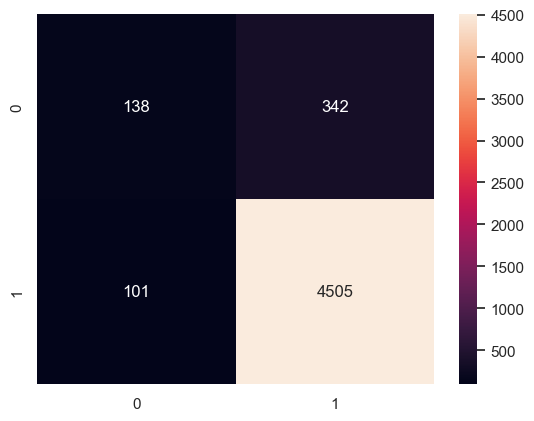

,0,1
0,138,342
1,101,4505


In [32]:
# Plot confusion matrix for Softmax Regression model's predictions on testing data
plot_confusion_matrix(y_tst_indices, testing_pred, None)

In [33]:
# Get classification report using Sklearn's classification_report()
from sklearn.metrics import classification_report

print(classification_report(y_tst_indices, testing_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.38       480
           1       0.93      0.98      0.95      4606

    accuracy                           0.91      5086
   macro avg       0.75      0.63      0.67      5086
weighted avg       0.90      0.91      0.90      5086



In [34]:
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_tst_indices, testing_pred)
print(f"Balanced Accuracy: {balanced_acc}")

Balanced Accuracy: 0.6327860399478941


In [35]:
# Using Random Forest model

In [36]:
# Determine categorical columns and use one-hot encoding
categorical_columns = ['AircraftType', 'AirportName', 'MakeModel', 'Operator', 'FlightPhase', 'OriginState', 'ConditionsSky', 'PilotWarned', 'NumberStruckActual', 'WildlifeSpecies', 'WildlifeSize', 'Engines']


encoder = preprocessing.OneHotEncoder(sparse_output=False)

X = bird_df.drop(columns='Damage', errors='ignore')
X = X[categorical_columns]

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns)
    ], 
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(X)

encoded_columns = column_transformer.get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

In [37]:
# Determine numerical columns
numerical_columns = ['Altitude']
X_numerical_df = bird_df.drop(columns='Damage', errors='ignore')
X_numerical_df = X_numerical_df[numerical_columns]

In [38]:
# Combine into a final dataframe of preprocessed data
final_df = pd.concat([X_encoded_df, X_numerical_df], axis=1)
final_df.head().T

,0,1,2,3,4
cat__AircraftType_Airplane,1.0,1.0,1.0,1.0,1.0
cat__AirportName_ABERDEEN REGIONAL AR,0.0,0.0,0.0,0.0,0.0
cat__AirportName_ABILENE REGIONAL ARPT,0.0,0.0,0.0,0.0,0.0
cat__AirportName_ABRAHAM LINCOLN CAPITAL ARPT,0.0,0.0,0.0,0.0,0.0
cat__AirportName_ADAMS COUNTY- LEGION FIELD,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
cat__Engines_3,0.0,0.0,0.0,0.0,0.0
cat__Engines_4,0.0,0.0,0.0,0.0,0.0
cat__Engines_C,0.0,0.0,0.0,0.0,0.0
cat__Engines_nan,0.0,0.0,0.0,0.0,0.0


In [39]:
# Apply one-hot encoding to the target
label_encoder = preprocessing.LabelEncoder()
bird_df['Damage'] = label_encoder.fit_transform(bird_df['Damage'])

In [40]:
X = final_df
y = bird_df['Damage']

In [41]:
X = X.values 
y = y.values
print(X.shape[0], ' ', y.shape[0])

25429   25429


In [42]:
from sklearn.ensemble import RandomForestClassifier
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_model.fit(X_trn, y_trn)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [43]:
# training accuracy
from sklearn.metrics import classification_report, accuracy_score

training_pred = rf_model.predict(X_tst)

acc = accuracy_score(y_tst, training_pred)

print(f"Training Accuracy: {acc}")

Training Accuracy: 0.9138812426268187


In [44]:
# validation accuracy
validation_pred = rf_model.predict(X_vld)

acc = accuracy_score(y_vld, validation_pred)

print(f"Validiation Accuracy: {acc}")

Validiation Accuracy: 0.9075940034406488


In [45]:
# testing accuracy
testing_pred = rf_model.predict(X_tst)

acc = accuracy_score(y_tst, testing_pred)

print(f"Testing Accuracy: {acc}")

Testing Accuracy: 0.9138812426268187


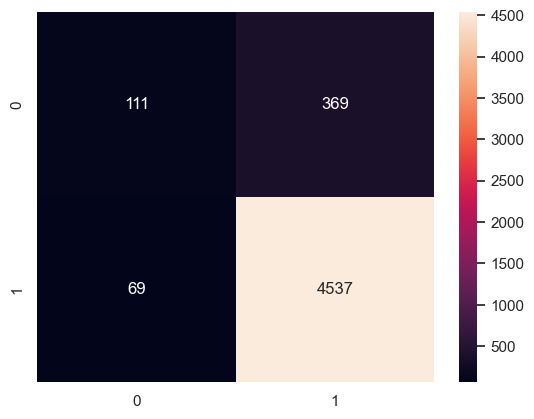

,0,1
0,111,369
1,69,4537


In [46]:
# Plot confusion matrix for Random Forest model's predictions on testing data
plot_confusion_matrix(y_tst, testing_pred, None)

In [47]:
# Get classification report using Sklearn's classification_report()
from sklearn.metrics import classification_report

print(classification_report(y_tst, testing_pred))

              precision    recall  f1-score   support

           0       0.62      0.23      0.34       480
           1       0.92      0.99      0.95      4606

    accuracy                           0.91      5086
   macro avg       0.77      0.61      0.65      5086
weighted avg       0.90      0.91      0.90      5086



In [48]:
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_tst, testing_pred)
print(f"Balanced Accuracy: {balanced_acc}")

Balanced Accuracy: 0.6081347698653929
